o x da raquete sempre é o memso.
eu tenho que fazer com que o y da minha raquete seja o mesmo y da minha bola.

In [5]:
def normalize(x):#
    return (x-np.min(x))/((np.max(x)-np.min(x))+0.001)

In [6]:
import sys, pygame,MLP
import numpy as np
from numpy.random import randint
import matplotlib.pyplot as plt

In [9]:
VERDE=255,0,0
AZUL=0,0,255

class Raquete:
    def __init__(self, tamanho,center=(50,400),COLOR=VERDE):
        self.imagem=pygame.Surface(tamanho)
        self.imagem.fill(COLOR)
        self.imagem_retangulo=self.imagem.get_rect(center=center)
        self.velocidade = 2

    def move(self, x, y):
        self.imagem_retangulo[0] += x * self.velocidade
        self.imagem_retangulo[1] += y * self.velocidade

    def atualiza(self, where, now ,ply=1):
    
        if now > where and ply == 1:
            self.move(0, -1)
        if now < where and ply == 1:
            self.move(0, 1)
        
        if now > where and ply == 2:
            self.move(0, -1)
        if now < where and ply == 2:
            self.move(0, 1)
        
        self.imagem_retangulo.clamp_ip(tela_retangulo)
        
    def realiza(self):
        screen.blit(self.imagem, self.imagem_retangulo)
        
    def colisao(self,ballrect):
        if self.imagem_retangulo.colliderect(ballrect): return True
        else: return False
    
    def getxy(self):
        return self.imagem_retangulo

SystemExit: 

C:\Users\patri\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3334: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


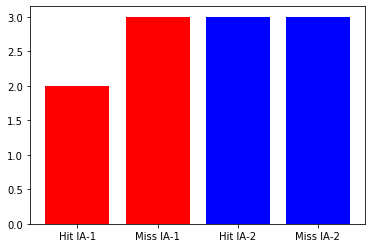

In [10]:
try:
    pygame.init()

    size = width, height = 800, 400

    raquete1=Raquete(tamanho=(10, 40),center=(0,0),COLOR=VERDE)
    raquete2=Raquete(tamanho=(10, 40),center=(width,200),COLOR=AZUL)

    speed = [2, 2]
    black = 0, 0, 0
    
    miss1=0
    miss2=0
    hit1=0
    hit2=0
    
    screen = pygame.display.set_mode(size)
    tela_retangulo=screen.get_rect()


    ball = pygame.image.load("ball.png")
    ballrect = ball.get_rect(center =(width//2,randint(low=20, high=380, size=1)))
    colision1 = False
    colision2 = False

    nn1 = MLP.NN(4,12,1)
    nn2 = MLP.NN(2,2,1)

    in1 = np.zeros((4,1))
    in2 = np.zeros((2,1)) 

    tempo=pygame.time.Clock()

    while 1:

            for event in pygame.event.get():
                if event.type == pygame.QUIT: 
                    x = ["Hit IA-1","Miss IA-1","Hit IA-2","Miss IA-2"]
                    y = [hit1,miss1,hit2,miss2]
                    a = plt.bar(x,y,color=("red","red","blue","blue"))
                    screen.blit(a,(100,100))
                    pygame.quit()
                    sys.exit()

            in1[0][0] = ballrect.x
            in1[1][0] = ballrect.y
            in1[2][0] = raquete1.getxy().x
            in1[3][0] = raquete1.getxy().y

            in2[0][0] = ballrect.y
            in2[1][0] = raquete2.getxy().y

            in1 = normalize(in1)
            in2 = normalize(in2)
            value1 = 0.5
            value2 = 0.5
            
            if speed[0] < 0:
                _,_,o1 = nn1.train(in1,in1[1][0])
                value1, po1= nn1.predict(in1)
            else:
                _,_,o2 = nn2.train(in2,in2[1][0])
                value2, po2 = nn2.predict(in2)

            where1 = int(value1*400)
            where2 = int(value2*400)
            
            ballrect = ballrect.move(speed)

            screen.fill(black)

            raquete1.realiza()
            raquete1.atualiza(where1,raquete1.getxy().y,ply=1)
            colision1 = raquete1.colisao(ballrect)

            raquete2.realiza()
            raquete2.atualiza(where2,raquete2.getxy().y,ply=2)
            colision2 = raquete2.colisao(ballrect)

            if colision1:
                hit1+=1
                speed[0] = -speed[0]
                colision1 = False   
                
            elif colision2:
                hit2+=1
                speed[0] = -speed[0]
                colision2 = False

            if ballrect.top < 0 or ballrect.bottom > height:
                    speed[1] = -speed[1]

            if ballrect.left < 0 or ballrect.right > width:
                    ballrect = ball.get_rect(center =(width//2,randint(low=20, high=380, size=1)))
                    if speed[0] < 0:
                        speed[0] = -speed[0]
                        miss1+=1
                    else: 
                        speed[0] = -speed[0]
                        miss2+=1

            screen.blit(ball, ballrect)
            pygame.display.flip()
            
except Exception as e:
    pygame.quit()
    sys.exit()
    print(e)